<a href="https://colab.research.google.com/github/amiism/DSA4263/blob/main/UsersDataExplore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/amiism/DSA4263/main/data/UsersData/combined_users_full.csv'
df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  11017 non-null  int64  
 1   name                                11016 non-null  object 
 2   screen_name                         11017 non-null  object 
 3   statuses_count                      11017 non-null  int64  
 4   followers_count                     11017 non-null  int64  
 5   friends_count                       11017 non-null  int64  
 6   favourites_count                    11017 non-null  int64  
 7   listed_count                        11017 non-null  int64  
 8   url                                 3508 non-null   object 
 9   lang                                10017 non-null  object 
 10  time_zone                           5015 non-null   object 
 11  location                            4908 

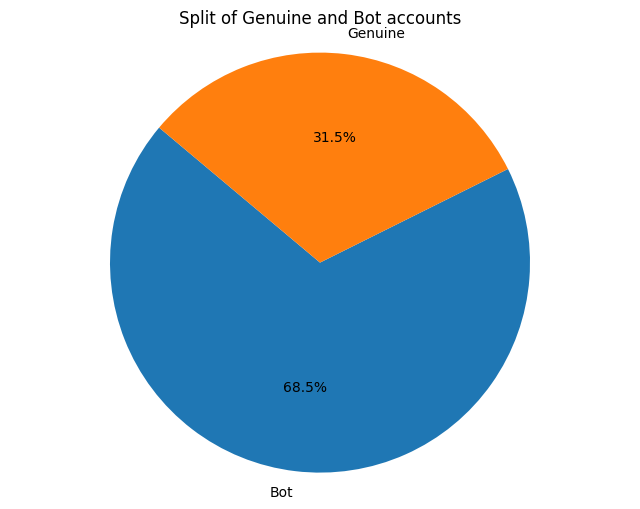

In [5]:
import matplotlib.pyplot as plt

# Count the occurrences of each type
type_counts = df1['Type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Split of Genuine and Bot accounts')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [5]:
#Grouping the data based on Type
# Grouping the data based on the 'Type' column
grouped_data = df1.groupby('Type')

# Getting information based on each group
for group_name, group_df in grouped_data:
    print(f"Type: {group_name}")
    print(group_df.info())

Type: Bot
<class 'pandas.core.frame.DataFrame'>
Index: 7543 entries, 0 to 11016
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  7543 non-null   int64  
 1   name                                7543 non-null   object 
 2   screen_name                         7543 non-null   object 
 3   statuses_count                      7543 non-null   int64  
 4   followers_count                     7543 non-null   int64  
 5   friends_count                       7543 non-null   int64  
 6   favourites_count                    7543 non-null   int64  
 7   listed_count                        7543 non-null   int64  
 8   url                                 2242 non-null   object 
 9   lang                                6543 non-null   object 
 10  time_zone                           2540 non-null   object 
 11  location                            2

In [6]:
# Drop columns with zero non-null elements
df2 = df1.dropna(axis=1, how='all')

# Display the cleaned DataFrame
#print(df2)
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  11017 non-null  int64  
 1   name                                11016 non-null  object 
 2   screen_name                         11017 non-null  object 
 3   statuses_count                      11017 non-null  int64  
 4   followers_count                     11017 non-null  int64  
 5   friends_count                       11017 non-null  int64  
 6   favourites_count                    11017 non-null  int64  
 7   listed_count                        11017 non-null  int64  
 8   url                                 3508 non-null   object 
 9   lang                                10017 non-null  object 
 10  time_zone                           5015 non-null   object 
 11  location                            4908 

In [7]:
# I want to check which columns have more than 50% of the rows missing and have a similar split between na and non na rows between the two Types
# Calculate the percentage of missing values in each column
missing_percentage = df2.isnull().mean() * 100

# Filter columns with more than 50% missing values
columns_with_high_missing = missing_percentage[missing_percentage > 50].index.tolist()

# Filter columns with similar split of na and non-na values between the two types. Threshold is 40-60 split
similar_split_columns = []
for column in columns_with_high_missing:
    null_proportions = df2.groupby('Type')[column].apply(lambda x: x.isnull().mean())
    null_proportions_diff = abs(null_proportions.diff().iloc[-1])
    if null_proportions_diff <= 0.2:  # Check if the absolute difference is within the range (40-60 split)
        similar_split_columns.append(column)

# Display the list of columns
print("Columns with more than 50% missing values and similar split between types:")
print(similar_split_columns)

Columns with more than 50% missing values and similar split between types:
['url', 'default_profile_image', 'profile_background_tile', 'is_translator', 'protected', 'verified']


In [8]:
# Create df3 by dropping columns with more than 50% missing values and similar split between types
df3 = df2.drop(columns=similar_split_columns)

In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  11017 non-null  int64  
 1   name                                11016 non-null  object 
 2   screen_name                         11017 non-null  object 
 3   statuses_count                      11017 non-null  int64  
 4   followers_count                     11017 non-null  int64  
 5   friends_count                       11017 non-null  int64  
 6   favourites_count                    11017 non-null  int64  
 7   listed_count                        11017 non-null  int64  
 8   lang                                10017 non-null  object 
 9   time_zone                           5015 non-null   object 
 10  location                            4908 non-null   object 
 11  default_profile                     1477 

In [10]:
df3.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang,time_zone,...,profile_link_color,utc_offset,description,created_at,timestamp,crawled_at,updated,test_set_1,test_set_2,Type
0,531256710,Christel Martillo,Martillodig,12515,787,1947,1,0,en,NaN,...,0084B4,NaN,Lover of life - need I say more!,Tue Mar 20 12:07:58 +0000 2012,2012-03-20 13:07:58,2014-05-05 23:23:09,2016-03-15 15:39:59,NaN,1.0,Bot
1,72081097,TMJ-ON CstSrv Jobs,tmj_on_cstsrv,117,300,247,0,30,en,Eastern Time (US & Canada),...,4A913C,-14400.0,Follow this account for geo-targeted Customer ...,Sun Sep 06 17:29:17 +0000 2009,2009-09-06 19:29:17,2016-03-15 13:49:10,2016-03-15 13:49:10,NaN,NaN,Bot
2,327060670,Federico Floria,Airolf,25930,10854,10606,418,66,it,NaN,...,0084B4,NaN,"Mika e' la mia vita, Supernatural la mia passi...",Thu Jun 30 22:59:43 +0000 2011,2011-07-01 00:59:43,2014-04-27 23:20:27,2016-03-15 14:13:49,1.0,NaN,Bot
3,2398910547,Southern Fields,southern_fields,730,1132,914,557,1,en,NaN,...,0084B4,NaN,"Just a plain ol' country boy. I love God, Geor...",Mon Mar 10 07:48:09 +0000 2014,2014-03-10 08:48:09,2014-05-02 23:22:50,2016-03-15 14:16:12,1.0,NaN,Bot
4,69218476,Vanessa,Vanessa8w3v,1,153,568,0,0,NaN,NaN,...,NaN,NaN,NaN,1251353539000L,2009-08-27 08:12:19,2010-11-07 11:10:52,2016-03-14 17:08:43,NaN,NaN,Bot


In [11]:
# Set display options to show full width of columns
pd.set_option('display.max_colwidth', None)

# Display the head of each column
for column in df3.columns:
    print(df3[column].head())

0     531256710
1      72081097
2     327060670
3    2398910547
4      69218476
Name: id, dtype: int64
0     Christel Martillo
1    TMJ-ON CstSrv Jobs
2       Federico Floria
3       Southern Fields
4               Vanessa
Name: name, dtype: object
0        Martillodig
1      tmj_on_cstsrv
2             Airolf
3    southern_fields
4        Vanessa8w3v
Name: screen_name, dtype: object
0    12515
1      117
2    25930
3      730
4        1
Name: statuses_count, dtype: int64
0      787
1      300
2    10854
3     1132
4      153
Name: followers_count, dtype: int64
0     1947
1      247
2    10606
3      914
4      568
Name: friends_count, dtype: int64
0      1
1      0
2    418
3    557
4      0
Name: favourites_count, dtype: int64
0     0
1    30
2    66
3     1
4     0
Name: listed_count, dtype: int64
0     en
1     en
2     it
3     en
4    NaN
Name: lang, dtype: object
0                           NaN
1    Eastern Time (US & Canada)
2                           NaN
3                    

In [ ]:
#I want to check if the URLs are valid
import requests

# urls_columns contains the columns with URLs
urls_columns = ['profile_background_image_url', 'profile_image_url_https', 'profile_background_image_url_https', 'profile_banner_url', 'profile_image_url']

# Function to check if URL is valid
def is_valid_url(url):
    try:
        response = requests.get(url)
        return response.status_code == 200
    except:
        return False

# Count invalid URLs for each column
invalid_counts = {}
for column in urls_columns:
    invalid_count = sum(~df3[column].fillna('').apply(is_valid_url))
    invalid_counts[column] = invalid_count

# Display the counts
for column, count in invalid_counts.items():
    print(f"Number of invalid URLs in '{column}': {count}")